## Image Resize

In [1]:
#!/usr/bin/python
from PIL import Image
import os, sys
path = "../../datasets/train/tsingtao/*"
path = os.path.dirname(os.path.abspath(path)) + '/'
dirs = os.listdir( path )
print(path)

C:\Users\JeanMichel\Desktop\Github_repositories\BARS\datasets\train\tsingtao/


## Package Import & Image Loading

In [2]:
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt
fps = glob.glob(path+'*.png')
fps.extend(glob.glob(path + '*.jpg'))
images = np.array(
    [cv2.cvtColor(cv2.imread(fp), cv2.COLOR_BGR2RGB) for fp in fps], # image batch size fps 크기로 조정
    dtype = np.uint8
)
print(np.shape(images))

(205, 480, 480, 3)


## Define Augmenter 

### case 1 ) Crop, Flip, GaussianBlur

In [3]:
seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
])

images_aug = seq(images=images)
print(images_aug.shape)

(205, 480, 480, 3)


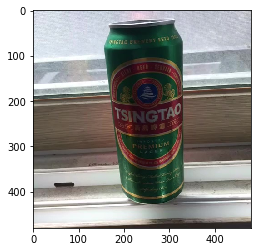

In [4]:
plt.imshow(images[0])

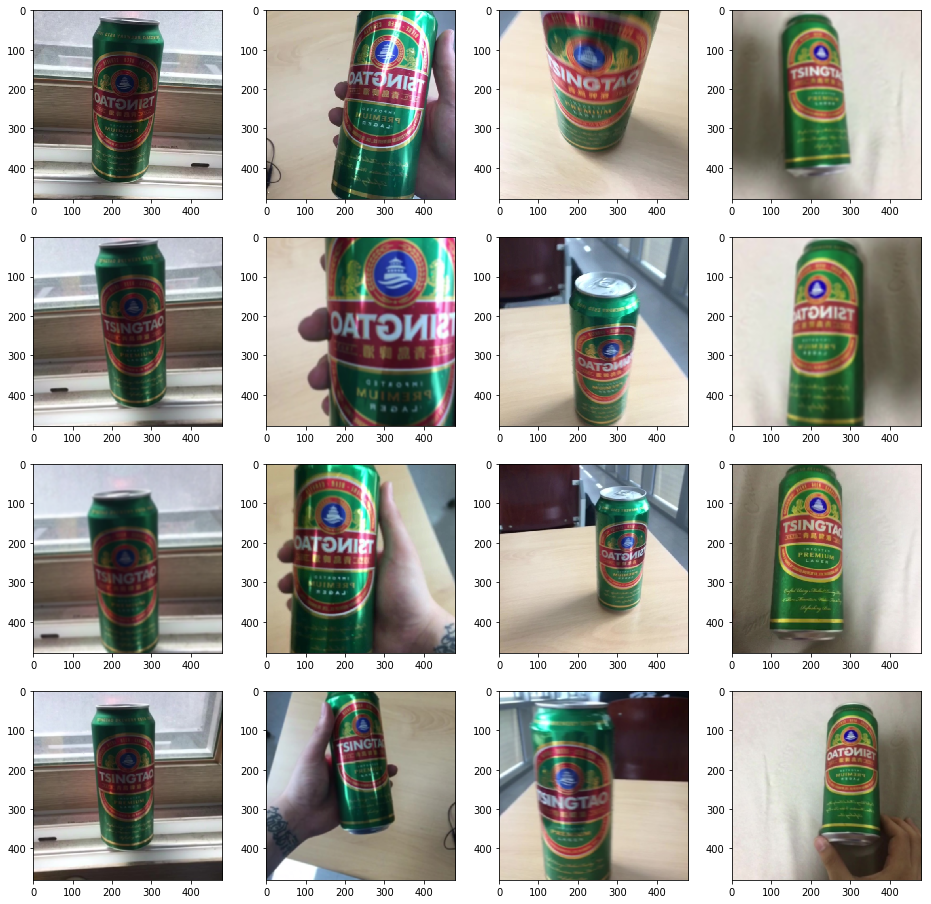

In [5]:
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = images_aug[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

## Save augmented images

In [6]:
from PIL import Image
import os, sys

path_aug = path+"softAug"
def saveSaugImages(path_aug):
    i=0
    for img in images_aug:
        cv2.imwrite(os.path.join(path_aug , 'sauged_'+ os.path.basename(fps[i])), cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        i += 1

saveSaugImages(path_aug)

### case 2) Flip, Crop, GaussianBlur, Contrast, Gaussian noise, Ligteness, Affine ( rigbody transform + shear )

In [7]:
import imgaug.augmenters as iaa

seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Crop(percent=(0, 0.1)), # random crops
    iaa.Sometimes(0.5, # gaussian blur with random sigma 0~0.5 in half of images
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    iaa.ContrastNormalization((0.75, 1.5)),# Strengthen or weaken the contrast in each image.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),    # Add gaussian noise.
    iaa.Multiply((0.8, 1.2), per_channel=0.2), # configure lighteness
    iaa.Affine(    # Affine Transform : Scale/zoom them, translate/move them, rotate them and shear them.
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    )
], random_order=True) # apply augmenters in random order

images_aug = seq(images=images)

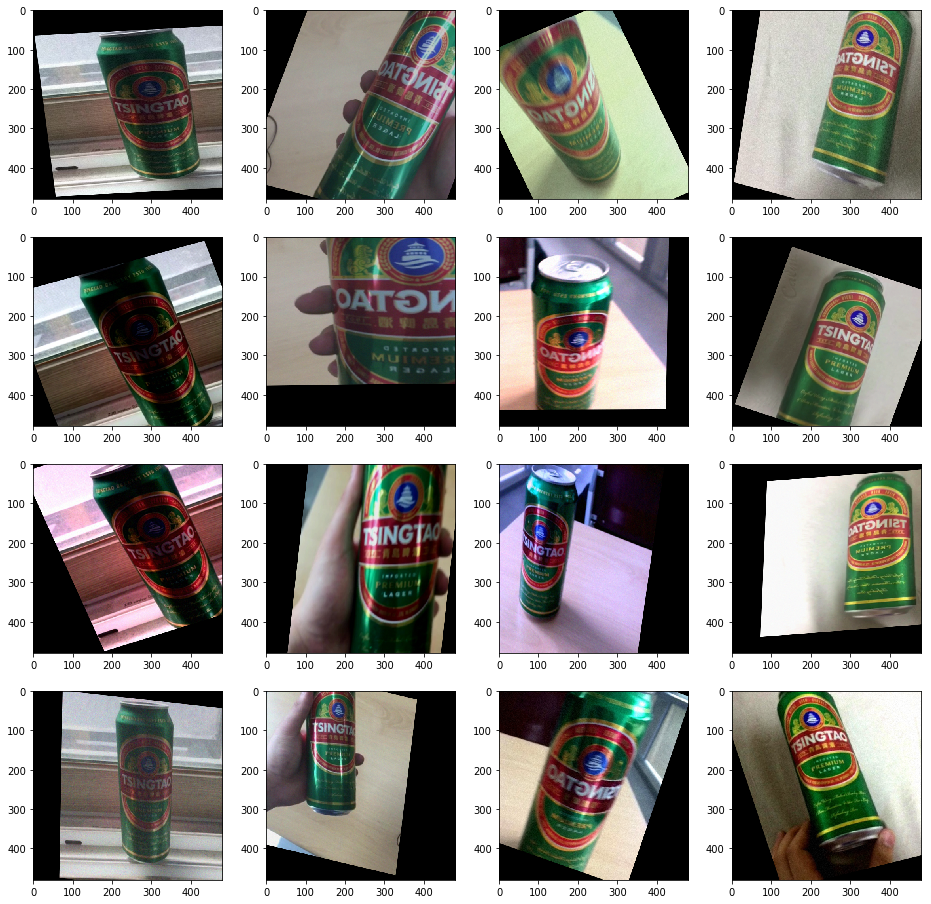

In [8]:
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = images_aug[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

## Save augmented images

In [9]:
from PIL import Image
import os, sys

path_aug = path+"hardAug"
def saveHaugImages(path_aug):
    i=0
    for img in images_aug:
        cv2.imwrite(os.path.join(path_aug, 'hauged_'+os.path.basename(fps[i])), cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        i += 1

saveHaugImages(path_aug)